In [1]:
# 用 sympy 來驗證 Chain-Rule

import sympy as sy

def f(x):
    y= 1 + x + x**2
    return y
def g(x):
    y= x**3
    return y

x= sy.symbols('x')

f(x)

x**2 + x + 1

In [435]:
g(x)

x**3

In [436]:
f(x).diff(x)

2*x + 1

In [437]:
g(x).diff(x)

3*x**2

In [438]:
f(g(x))

x**6 + x**3 + 1

In [439]:
g(f(x))

(x**2 + x + 1)**3

In [440]:
g(f(x)).expand()

x**6 + 3*x**5 + 6*x**4 + 7*x**3 + 6*x**2 + 3*x + 1

In [441]:
ϕ, γ= sy.symbols('ϕ, γ') # ϕ, γ are Greek letters for f, g
f(γ)

γ**2 + γ + 1

In [442]:
g(ϕ)

ϕ**3

In [443]:
Φ = f(g(x))
Φ

x**6 + x**3 + 1

In [445]:
Γ= g(f(x))
Γ.expand()

x**6 + 3*x**5 + 6*x**4 + 7*x**3 + 6*x**2 + 3*x + 1

In [446]:
Φ_γ= f(γ)
Φ_γ

γ**2 + γ + 1

In [447]:
Γ_ϕ= g(ϕ)
Γ_ϕ

ϕ**3

In [448]:
Φ_γ.diff(γ)

2*γ + 1

In [449]:
g(x).diff(x)

3*x**2

In [451]:
# dΦ/dγ * dγ/dx
(
Φ_γ.diff(γ) 
* g(x).diff(x)
).subs(γ, g(x))

3*x**2*(2*x**3 + 1)

In [452]:
#dΦ/dx
Φ.diff(x)

6*x**5 + 3*x**2

In [454]:
#  dΦ/dγ * dγ/dx ==  dΦ/dx
assert (
Φ_γ.diff(γ) 
* g(x).diff(x)
).subs(γ, g(x)).expand() == Φ.diff(x).expand()

In [455]:
# dΓ/dϕ * dϕ/dx
(
Γ_ϕ.diff(ϕ) 
* f(x).diff(x)
).subs(ϕ, f(x))

3*(2*x + 1)*(x**2 + x + 1)**2

In [456]:
#dΓ/dx
Γ.diff(x)

(6*x + 3)*(x**2 + x + 1)**2

In [457]:
# dΓ/dϕ * dϕ/dx == dΓ/dx
assert (
Γ_ϕ.diff(ϕ) 
* f(x).diff(x)
).subs(ϕ, f(x)).expand() == Γ.diff(x).expand()

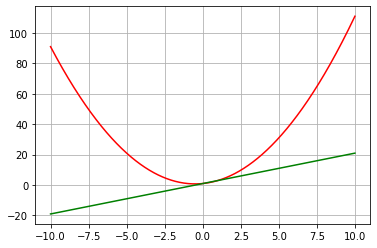

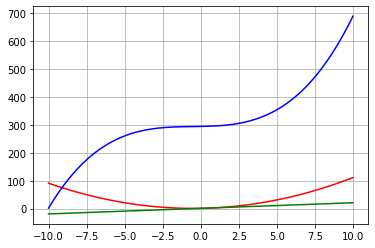

In [367]:

# 用 numpy 來算微分、積分、並作圖
def f(x):
    y= 1 + x + x**2
    #y= np.cos(x) + np.cos(2*x) + np.cos(3*x)
    #y= np.exp(-x) * np.cos(x)
    return y

x= np.linspace(-10,10,1001) # N=1001 越大越好，代表，分得越精細，  dx -->0
y= f(x)

#z= y.diff()

dx= x[1:]-x[0:-1]
#dx= np.append(dx, dx[-1])
dx= np.insert(dx, 0, dx[0])  # 在最前端補1點 = dx[0]

dy= y[1:]-y[0:-1]
#dy= np.append(dy, dy[-1])
dy= np.insert(dy,0, dy[0]) # 在最前端補1點 = dy[0]
dy_dx= dy/dx

import matplotlib.pyplot as pl
pl.plot(x, y, 'r', 
        x, dy_dx,'g')
pl.grid()
pl.show()

# 用 numpy 來算積分並作圖

sY= (y*dx).cumsum()

#sY= np.insert(sY, 0, y[0]) # 在最前端補1點 = y[0]
# .cumsum() 不須補 0 了

pl.plot(x, y, 'r',
        x, dy_dx, 'g',
        x, sY,'b')
pl.grid()
pl.show()

In [419]:
import sympy as sy

x=  sy.Symbol('x')
def f(x):
    y= 1 +x +x**2
    return y

f(x)

x**2 + x + 1

In [420]:
def g(x):
    y= x**3
    return y

g(x)

x**3

In [421]:
f(g(x))

x**6 + x**3 + 1

In [429]:
g(f(x)).expand()

x**6 + 3*x**5 + 6*x**4 + 7*x**3 + 6*x**2 + 3*x + 1

In [423]:
ϕ, γ= sy.symbols('ϕ, γ')


In [424]:
f(g(x)).subs(g(x),γ)

γ**2 + γ + 1

In [425]:
g(f(x)).subs(f(x),ϕ)

ϕ**3

In [426]:
f(g(x)).subs(g(x),γ).diff(γ)

2*γ + 1

In [428]:
f(γ).diff(γ)

2*γ + 1

In [371]:
import sympy as sy

x=  sy.Symbol('x')
def f(x):
    y= 1 + x + x**2
    #y= sy.cos(x) + sy.cos(2*x) + sy.cos(3*x)
    #y= sy.exp(-x) * sy.cos(x)
    return y

f(x)

x**2 + x + 1

In [374]:
y= f(x)
y

x**2 + x + 1

In [383]:
z= f(f(x))
z

x**2 + x + (x**2 + x + 1)**2 + 2

In [384]:
f(x).diff(x)

2*x + 1

In [387]:
f(q).diff(q)

2*q + 1

In [408]:
# df/dq

q= sy.Symbol('q')

df_dq= (
f(f(x))
.subs(f(x),q)
.diff(q)
.subs(q,f(x))
)

In [407]:
# dq/dx
dq_dx= (
q
.subs(q, f(x))
.diff(x)
)


In [406]:
#df/dx
df_dx= f(f(x)).diff(x)


In [410]:
df_dx.expand()

4*x**3 + 6*x**2 + 8*x + 3

In [412]:
(df_dq * dq_dx).expand()


4*x**3 + 6*x**2 + 8*x + 3

In [381]:

q= sy.Symbol('q')
z= f(q)
z

q**2 + q + 1

In [382]:
z.subs(q, f(x))

x**2 + x + (x**2 + x + 1)**2 + 2

In [184]:
x=  sy.Symbol('x')
dx= sy.Symbol('dx')
x, dx

(x, dx)

In [262]:
def f(x):
    y= 1 + x + x**2
    #y= sy.cos(x) + sy.cos(2*x) + sy.cos(3*x)
    #y= sy.exp(-x) * sy.cos(x)
    return y

f(x)

x**2 + x + 1

In [224]:
((f(x+dx)-f(x))/dx
).limit(dx,0)

-sin(x) - 2*sin(2*x) - 3*sin(3*x)

In [225]:
f(x).diff(x)

-sin(x) - 2*sin(2*x) - 3*sin(3*x)

In [227]:
float(f(1))

-0.8658370272794481

In [251]:
p= x**2+x+1
q= p**2
p

x**2 + x + 1

In [257]:
q

(x**2 + x + 1)**2

In [258]:
z= sy.Symbol('z')
q.subs(p, z)

z**2

In [261]:
f(x)

cos(x) + cos(2*x) + cos(3*x)

In [263]:
f(x)

x**2 + x + 1

In [264]:
def f(x):
    y= x**2 +x +1
    return y

def g(x):
    y= x**2
    return y


In [273]:
x= sy.symbols('x')
F= f(x)
F

x**2 + x + 1

In [274]:
G= g(x)
G

x**2

In [279]:
F_G= f(g(x))
F_G

x**4 + x**2 + 1

In [280]:
F_G.diff(x)

4*x**3 + 2*x

In [287]:
f(x), g(x), f(g(x))

(x**2 + x + 1, x**2, x**4 + x**2 + 1)

In [289]:
f(x).diff(x), g(x).diff(x), f(g(x)).diff(x)

(2*x + 1, 2*x, 4*x**3 + 2*x)

In [296]:
((
(f(z).diff(z))
.subs(z, g(x))
)
*g(x).diff(x)
)

2*x*(2*x**2 + 1)

In [297]:
f(g(x)).diff(x)

4*x**3 + 2*x

In [31]:

f= 1 + x + x**2
g= sy.cos(x) +sy.cos(2*x) + sy.cos(3*x)
h= sy.exp(x) + sy.exp(2*x) +sy.exp(3*x)


In [323]:

# f1()= f'()         # differentiation
# f2()= f1'()= f2()  # 2nd differentiation
# F()= Σ f(x)dx      # integration


def f(x):
    y= x**2+x+1
    #y= sy.sin(x) * sy.exp(-x)
    return y

x= sy.symbols('x')
f(x)

x**2 + x + 1

In [328]:
f1= f(x).diff(x)
f1

2*x + 1

In [335]:
F= f(x).integrate(x)
F

x**3/3 + x**2/2 + x

In [334]:
F01= f(x).integrate(x, (x,0,1))
F01

3/4

In [332]:
float(F01)

0.75

In [339]:
F.subs(x,1)-F.subs(x,0)

11/6

In [340]:
F

x**3/3 + x**2/2 + x

In [342]:
g= f(x)

In [349]:
g.integrate(x,(x,0,1))

3/4

In [352]:
g.integrate(x,(x,0,1))

3/4

In [354]:
G= g.integrate(x)
G

x**3/3 + x**2/2 + x

In [356]:
G.subs(x,1)-G.subs(x,-1)

8/3

In [357]:
g.integrate(x,(x,-1,1))

1/3

In [360]:
sy.integrate(g,(x,0,1))

11/6

In [363]:
g.integrate((x,0,1))

11/6

In [366]:
g.integrate((x,0,1))

11/6

In [43]:
F= (f*g*h).expand()
F.subs(x, 1)

-78.42632701693294

In [69]:
q= sy.csc(x)
q.period()


2*pi

In [79]:
A= [[2,1],
    [1,2]]

A= sy.Matrix(A)
A

Matrix([
[2, 1],
[1, 2]])

In [81]:
A.eigenvects()

[(1,
  1,
  [Matrix([
   [-1],
   [ 1]])]),
 (3,
  1,
  [Matrix([
   [1],
   [1]])])]

In [84]:
A.inv()

Matrix([
[ 2/3, -1/3],
[-1/3,  2/3]])

In [85]:
A.transpose()

Matrix([
[2, 1],
[1, 2]])

In [90]:
A.inv()


Matrix([
[ 2/3, -1/3],
[-1/3,  2/3]])

In [102]:
import numpy as np
np.array(A)

array([[2, 1],
       [1, 2]], dtype=object)

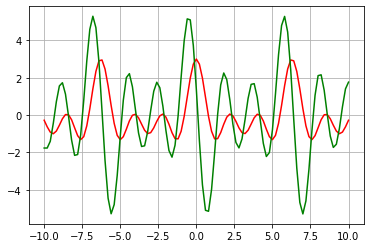

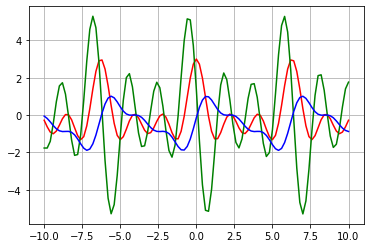

In [104]:
A.transpose()

Matrix([
[2, 1],
[1, 2]])

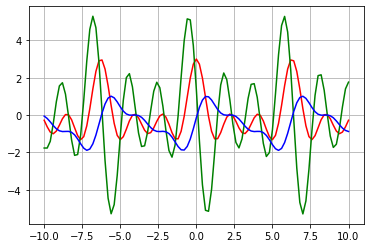

In [159]:
len(sY)

101

In [162]:
z= np.array([1,2,3,4])
z.cumsum()

array([ 1,  3,  6, 10], dtype=int32)

In [126]:

dy= y[1:]-y[0:-1]
dy= np.append(dy,0)

In [20]:
sy.sin(x).diff(x).diff(x).diff(x)

-cos(x)

In [21]:
x, dx= sy.symbols('x, dx')
x, dx

In [28]:
(sy.sin(dx)/dx).limit(dx,0)

1

In [4]:
sy.symbols('x, y, z, a, b, c')

(x, y, z, a, b, c)

In [7]:
sy.symbols('a:10')

(a0, a1, a2, a3, a4, a5, a6, a7, a8, a9)

In [8]:
type(x)
#sympy.core.symbol.Symbol

NameError: name 'x' is not defined

In [22]:
f= x+y
type(f)

sympy.core.add.Add

In [26]:
x.subs(x, 10)

10

In [31]:
f= (x+y)**2
f, f.subs({x:10, y:20})

((x + y)**2, 900)

In [48]:
q= Rational(1,3)
q, float(q)

(1/3, 0.3333333333333333)

In [50]:
q1= Rational(1,3) 
q2= Rational(2,5)
q= q1+q2
q, float(q)

(11/15, 0.7333333333333333)

In [42]:
Integer(1)/Integer(3) == Rational(1,3)

True

In [51]:
Integer(1)/Integer(3) == 1/3

False

In [1]:
import math
import numpy as np
import sympy


In [3]:
x= 1
y= 2
z= x+y
z

3

In [5]:
x= [1,1]
y= [2,2]
z= x+y
z

[1, 1, 2, 2]

In [10]:
xx= np.array([1,1])
yy= np.array([2,2])
zz= xx+yy
zz

array([3, 3])

In [11]:
x,y= sympy.symbols('x, y')
z= x+y
z

x + y

In [15]:
z, z.subs({x:1, y:2})

(x + y, 3)

In [16]:
z, z.subs({x:100, y:200})

(x + y, 300)

In [17]:
z= (x+y)**2
z


(x + y)**2

In [19]:
z1= sympy.expand(z)
z1

x**2 + 2*x*y + y**2

In [24]:
z.subs({x:10, y:20})

900

In [25]:
z1.subs({x:10, y:20})

900

In [26]:
z2= sympy.factor(z1)
z2

(x + y)**2

In [463]:
x= sy.Integer(1)
y= sy.Integer(3)
x/y, float(x/y)

(1/3, 0.3333333333333333)

sympy.core.numbers.Float

In [467]:
float(sy.sqrt(2))

1.4142135623730951

In [468]:
float(sy.pi)

3.141592653589793

In [470]:
def f(x):
    y= sy.sin(1 + x + x**2)
    return y
x= sy.symbols('x')
f(x)

sin(x**2 + x + 1)

In [472]:
g= f(x).diff(x)
g

(2*x + 1)*cos(x**2 + x + 1)

In [481]:
t= np.linspace(0,1,101)

sy.lambdify(
    x, f(x).diff(x), 'numpy'
)(t)

array([ 0.54030231,  0.54241156,  0.54394607,  0.54488989,  0.54522694,
        0.54494103,  0.54401585,  0.54243503,  0.5401821 ,  0.53724054,
        0.53359382,  0.52922536,  0.52411858,  0.51825695,  0.51162396,
        0.50420317,  0.49597823,  0.48693292,  0.47705116,  0.46631702,
        0.4547148 ,  0.44222902,  0.42884446,  0.41454621,  0.39931968,
        0.38315065,  0.3660253 ,  0.34793027,  0.32885265,  0.30878008,
        0.28770076,  0.26560349,  0.24247773,  0.21831363,  0.19310208,
        0.16683479,  0.13950428,  0.11110397,  0.08162824,  0.05107245,
        0.01943301, -0.01329257, -0.04710561, -0.08200624, -0.1179933 ,
       -0.15506432, -0.19321544, -0.23244136, -0.27273528, -0.31408886,
       -0.35649211, -0.39993341, -0.44439938, -0.48987485, -0.53634283,
       -0.5837844 , -0.63217869, -0.6815028 , -0.73173179, -0.78283857,
       -0.83479388, -0.88756624, -0.9411219 , -0.99542476, -1.05043638,
       -1.1061159 , -1.16242001, -1.21930292, -1.27671631, -1.33

In [473]:

import numpy as np
import pandas as pd

